In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, hinge_loss, precision_score, recall_score )
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import joblib

In [2]:
# Load the preprocessed_data.csv file
data_selected = pd.read_csv('preprocessed_data.csv')

In [3]:
# Checking for missing values in the new csv file
print(data_selected.isnull().sum())

Year             0
Dis Mag Scale    0
Dis Mag Value    0
Country          0
Longitude        0
Latitude         0
Disaster Type    0
dtype: int64


In [4]:
# Checking the class distribution
print(data_selected['Disaster Type'].value_counts())

5     5551
12    4496
2     1544
3     1501
10     776
1      770
4      603
14     471
13     265
9       96
11      48
7        2
6        1
8        1
0        1
Name: Disaster Type, dtype: int64


#### Our data is not balanced, so to balance our data we are using Random Oversampler Technique

In [5]:
# Separating feature set and target variable
X = data_selected.drop('Disaster Type', axis=1)
y = data_selected['Disaster Type']

# Initializing the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fitting and applying the oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [6]:
# Checking the new class distribution
print(pd.Series(y_resampled).value_counts())

1     5551
2     5551
13    5551
11    5551
12    5551
5     5551
3     5551
10    5551
14    5551
4     5551
6     5551
9     5551
8     5551
0     5551
7     5551
Name: Disaster Type, dtype: int64


#### Now as we have a balanced data, we are processing from step 4 (model development) again

In [7]:
# Splitting the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing/Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation the Random Forest model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print('\n')

# Training the Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation the SVM model
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print('\n')

# Training the K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation the KNN model
print("\nK-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print('\n')

# Training the Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluation the Naive Bayes model
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Random Forest Classifier:
Accuracy: 0.953822134150003



Support Vector Machine (SVM):
Accuracy: 0.6500330270822074



K-Nearest Neighbors (KNN):
Accuracy: 0.9313036690085871



Naive Bayes:
Accuracy: 0.6532156368221942


In [8]:
# Evaluating the performance of Random Forest
print("Random Forest Classifier Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_rf, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("\n")

# Evaluating the performance of SVM
print("Support Vector Machine (SVM)-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_svm, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("\n")

# Evaluating the performance of K-NN
print("K-Nearest Neighbor (K-NN)-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_knn, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("\n")

# Evaluating the performance of Navie Bayes
print("Navie Bayes-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_nb, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("\n")

Random Forest Classifier Evaluation Metrics:
F1 Score: 0.9519389979386549
Accuracy: 0.953822134150003
Recall (Sensitivity): 0.953822134150003
Precision: 0.9551815103634058


Support Vector Machine (SVM)-Evaluation Metrics:
F1 Score: 0.633872977472952
Accuracy: 0.6500330270822074
Recall (Sensitivity): 0.6500330270822074
Precision: 0.6828630625480667


K-Nearest Neighbor (K-NN)-Evaluation Metrics:
F1 Score: 0.9257928204090926
Accuracy: 0.9313036690085871
Recall (Sensitivity): 0.9313036690085871
Precision: 0.9316341489311692


Navie Bayes-Evaluation Metrics:
F1 Score: 0.6297211670429899
Accuracy: 0.6532156368221942
Recall (Sensitivity): 0.6532156368221942
Precision: 0.7167261979602237




In [9]:
# Combining individual models to form a Ensemble Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Creating a hard voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('knn', knn_model),
    ('nb', nb_model)
], voting='hard')

# Fitting the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
print("\nEnsemble Model (Hard Voting):")
print("F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))


Ensemble Model (Hard Voting):
F1 Score: 0.9194778735553807
Accuracy: 0.9236173662403171
Recall (Sensitivity): 0.9236173662403171
Precision: 0.92917968439649


## Performing Ensemble Techniques

### Hard voting Ensemble combining 4 models

In [10]:
# Combining individual models to form a Ensemble Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Creating a hard voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('knn', knn_model),
    ('nb', nb_model)
], voting='hard')

# Fitting the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
print("\nEnsemble Model (Hard Voting):")
print("F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))


Ensemble Model (Hard Voting):
F1 Score: 0.9194778735553807
Accuracy: 0.9236173662403171
Recall (Sensitivity): 0.9236173662403171
Precision: 0.92917968439649


### Soft voting ensemble for svm and random forest

In [11]:
# Combining individual models with probability estimates to form an Ensemble Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Creating a soft voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('knn', knn_model),
    ('nb', nb_model)
], voting='soft')

# Fitting the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
print("\nEnsemble Model (Soft Voting):")
print("F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))


Ensemble Model (Soft Voting):
F1 Score: 0.9350887804598705
Accuracy: 0.9390500210172341
Recall (Sensitivity): 0.9390500210172341
Precision: 0.9432068551415105


### Visualization of Performance metrics using Grouped Bar chart

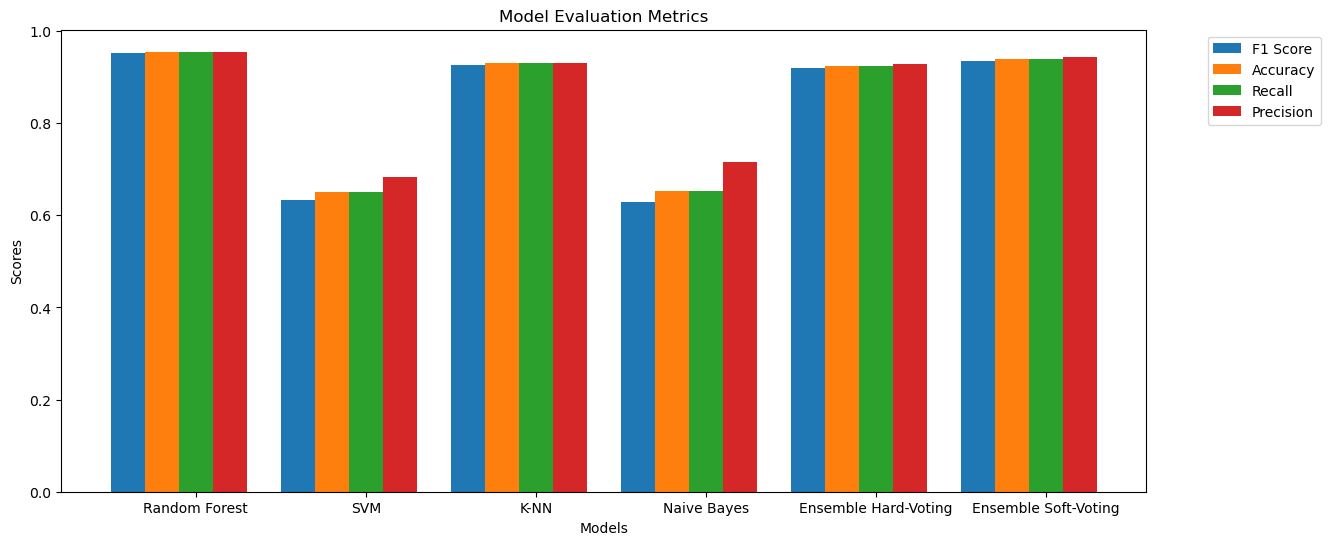

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their respective perfromance metrics
models = ['Random Forest', 'SVM', 'K-NN', 'Naive Bayes', 'Ensemble Hard-Voting', 'Ensemble Soft-Voting']
f1_scores = [0.9519, 0.6340, 0.9258, 0.6297, 0.91947, 0.93508 ]
accuracies = [0.9538, 0.6501, 0.9313, 0.6532, 0.92361, 0.93905 ]
recalls = [0.9538, 0.6501, 0.9313, 0.6532, 0.92361, 0.93905]
precisions = [0.9552, 0.6831, 0.9316, 0.7167, 0.92917, 0.94320]

# Grouped Bar chart
bar_width = 0.2
index = np.arange(len(models))

# Plotting the chart
fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(index - bar_width, f1_scores, bar_width, label='F1 Score')
bar2 = ax.bar(index, accuracies, bar_width, label='Accuracy')
bar3 = ax.bar(index + bar_width, recalls, bar_width, label='Recall')
bar4 = ax.bar(index + 2 * bar_width, precisions, bar_width, label='Precision')

# Settign up the Legend and Title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

#### * After visualizing the Grouped bar chart, we consider Random Forest to be our best Model <br> * We wanted to assess the generaliziability and performance of our model further. <br> * To achieve this we have done HyperParameter Tuning and Cross validation on our best model. <br>

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Performing Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters for Random Forest:", best_params)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
# Loading Cross-Validation results into a Data frame
cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nCross-Validation Results:")
print(cv_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']])


Cross-Validation Results:
   param_n_estimators param_max_depth param_min_samples_split  \
0                  50            None                       2   
1                 100            None                       2   
2                 150            None                       2   
3                  50            None                       5   
4                 100            None                       5   
..                ...             ...                     ...   
76                100              20                       5   
77                150              20                       5   
78                 50              20                      10   
79                100              20                      10   
80                150              20                      10   

   param_min_samples_leaf  mean_test_score  
0                       1         0.948733  
1                       1         0.948928  
2                       1         0.948793  
3           

#### Perfroming evalution metrics again on the Best model after Hyperparameter Tuning

In [15]:
# Evaluate the best model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

# Model Evaluation after Hyperparameter Tuning
print("Random Forest Classifier after Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("F1 Score:", f1_score(y_test, y_pred_rf_tuned, average='weighted'))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_rf_tuned, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_rf_tuned, average='weighted'))

Random Forest Classifier after Hyperparameter Tuning:
Accuracy: 0.953822134150003
F1 Score: 0.9519389979386549
Recall (Sensitivity): 0.953822134150003
Precision: 0.9551815103634058


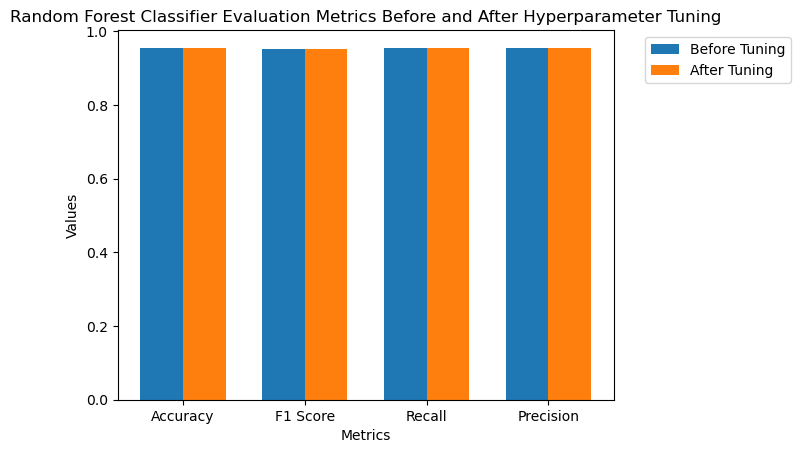

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics before hyperparameter tuning
metrics_before_tuning = {
    'Accuracy': 0.953822134150003,
    'F1 Score': 0.9519389979386549,
    'Recall': 0.953822134150003,
    'Precision': 0.9551815103634058
}

# Metrics after hyperparameter tuning
metrics_after_tuning = {
    'Accuracy': 0.953822134150003,
    'F1 Score': 0.9519389979386549,
    'Recall': 0.953822134150003,
    'Precision': 0.9551815103634058
}

metrics_names = list(metrics_before_tuning.keys())
values_before_tuning = list(metrics_before_tuning.values())
values_after_tuning = list(metrics_after_tuning.values())

bar_width = 0.35
index = np.arange(len(metrics_names))

fig, ax = plt.subplots()
bar1 = ax.bar(index, values_before_tuning, bar_width, label='Before Tuning')
bar2 = ax.bar(index + bar_width, values_after_tuning, bar_width, label='After Tuning')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Random Forest Classifier Evaluation Metrics Before and After Hyperparameter Tuning')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### After visualzing the above graph we can observe that there is no change in the performance metrics of our best model, before and after hyper parameter tuning

#### Hence, we conclude that Our Best Model, Random forest's best performance metrics are <br>
<b>Accuracy =  0.953822134150003<br>
    F1 Score = 0.9519389979386549<br>
    Recall =  0.953822134150003<br>
    Precision = 0.9551815103634058</b>

## Step 7: Saving the Model

In [17]:
# Fitting the Random Forest Classifier
rf_model.fit(X_train_scaled, y_train)

# Saving the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

# Evaluating the model
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.953822134150003


In [18]:
# Initializing the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fitting and applying the oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Saving the oversampler to a file
joblib.dump(oversampler, 'oversampler.joblib')

['oversampler.joblib']